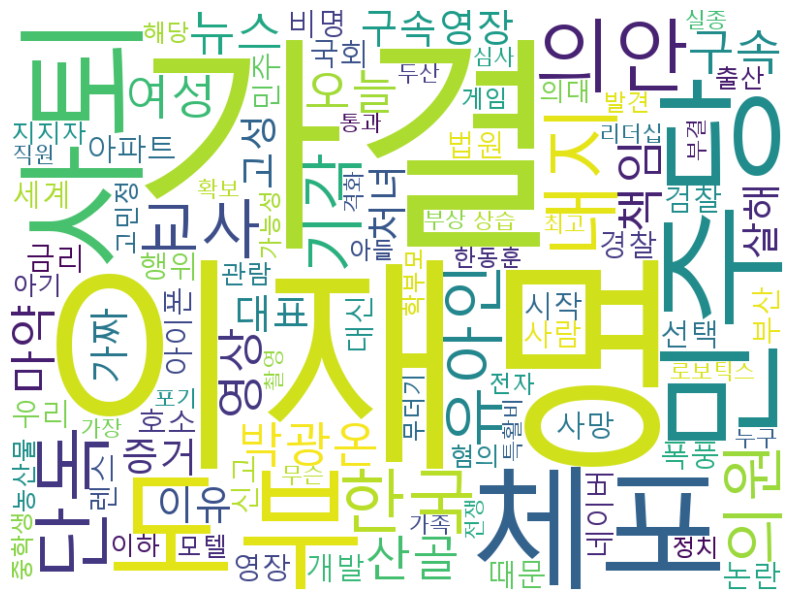

In [3]:
#1 긴 문장/text data 수집하기
import requests
from bs4 import BeautifulSoup as BS
import pandas as pd
import numpy as np
import re

#1-1 네이버 뉴스 긁어오기
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.135 Safari/537.36'}

head_list = [] #네이버 헤드라인 담을 리스트 
start_data = 20230901 #데이터 수집 날짜
end_data = 20230920 #데이터 수집 끝나는 날짜

#네이버 뉴스 정보 받아오기
for date_int in range(start_data, end_data): #시작날부터 끝나는날까지 반복
    date = str(date_int)
    url = "https://news.naver.com/main/ranking/popularDay.nhn?date=" + date
    html = requests.get(url, headers=headers).text
    soup = BS(html, 'html.parser')
    ranking_total = soup.find_all(class_='rankingnews_box')

    #랭킹박스에있는 뉴스 헤드라인 받아오기
    for item in ranking_total:
        news = item.find_all(class_="list_content")
        for new in news:
            d = {}
            head_list.append(d)

#1-2 네이버 뉴스 헤드라인 저장
df = pd.DataFrame(head_list)

#변환한 데이터프레임을 메모장에 구분자를 변경하고, 인덱스를 제외한 후 저장했습니다.
headline_txt = df.to_csv('headline.txt', sep = '\t', index = False)

#2 가져온 텍스트파일 정제화하기
from konlpy.tag import Okt
from collections import Counter
import csv

# 파일을 읽을 때 UTF-8 인코딩을 사용했습니다.
with open('headline.txt', 'r', encoding='utf-8') as f:
    news = f.read()

# okt 객체 선언
okt = Okt()
noun = okt.nouns(news)

# 길이가 1인 명사 제외
noun = [word for word in noun if len(word) >= 2]

count = Counter(noun)

# 명사 빈도 세기(상위 100개)
noun_list = count.most_common(100)

# 명사와 빈도를 텍스트 파일에 저장
with open("noun_list.txt", "w", encoding="utf-8") as f:
    for z in noun_list:
        f.write(" ".join(map(str, z)))
        f.write("\n")

# 명사와 빈도를 CSV 파일에 저장
with open("noun_list.csv", "w", newline="", encoding="euc-kr") as f:
    csvw = csv.writer(f)
    for g in noun_list:
        csvw.writerow(g)

 
#3 텍스트파일 워드클라우드로 시각화
# WordCloud 객체 생성
wordcloud = WordCloud(
    background_color='white',  # 배경색상을 지정합니다.
    width=800, height=600,  # 워드클라우드 이미지 크기를 지정합니다.
    font_path='C:/Windows/Fonts/malgun.ttf'  # 한글 폰트 경로를 지정합니다.   
)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 텍스트 데이터를 읽어옵니다.
with open('noun_list.txt', 'r', encoding='utf-8') as f:
    text = f.read()

# 텍스트 데이터를 기반으로 워드클라우드 생성
wordcloud.generate(text)

# 워드클라우드를 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # 축을 비활성화하여 불필요한 눈금과 축을 제거합니다.
plt.show()